In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input
from tensorflow.keras.utils import to_categorical

#Load dataset
train_data = pd.read_csv('mnist_train.csv')
test_data = pd.read_csv('mnist_test.csv')

#Prepare data
train_x = train_data.drop('label', axis=1).values
train_y = train_data['label'].values
test_x = test_data.drop('label', axis=1).values
test_y = test_data['label'].values

#Reshape and normalize
train_x = train_x.reshape(-1, 28, 28, 1) / 255.0
test_x = test_x.reshape(-1, 28, 28, 1) / 255.0

#One-hot encode labels
train_y_cat = to_categorical(train_y)
test_y_cat = to_categorical(test_y)

#Build the CNN model
input_layer = Input(shape=(28, 28, 1))
conv1 = Conv2D(8, (3, 3), activation='relu', padding='same')(input_layer)
pool1 = MaxPooling2D((2, 2), strides=2)(conv1)
conv2 = Conv2D(16, (3, 3), activation='relu', padding='same')(pool1)
pool2 = MaxPooling2D((2, 2), strides=2)(conv2)
flatten = Flatten()(pool2)
output_layer = Dense(10, activation='softmax')(flatten)

model = Model(inputs=input_layer, outputs=output_layer)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#Train the model
history = model.fit(train_x, train_y_cat, epochs=100, validation_data=(test_x, test_y_cat))

Epoch 1/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.8447 - loss: 0.5110 - val_accuracy: 0.9713 - val_loss: 0.0905
Epoch 2/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9760 - loss: 0.0799 - val_accuracy: 0.9798 - val_loss: 0.0622
Epoch 3/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9816 - loss: 0.0591 - val_accuracy: 0.9833 - val_loss: 0.0529
Epoch 4/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9850 - loss: 0.0488 - val_accuracy: 0.9860 - val_loss: 0.0452
Epoch 5/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9873 - loss: 0.0410 - val_accuracy: 0.9849 - val_loss: 0.0435
Epoch 6/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9891 - loss: 0.0358 - val_accuracy: 0.9867 - val_loss: 0.0434
Epoch 7/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9894 - loss: 0.0322 - val_accuracy: 0.9877 - val_loss: 0.0397
Epoch 8/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9911 -

input_layer: 0 parameters
conv2d: 80 parameters
max_pooling2d: 0 parameters
conv2d_1: 1168 parameters
max_pooling2d_1: 0 parameters
flatten: 0 parameters
dense: 7850 parameters
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step

b. Size of final extracted feature vector: 784

c. Training accuracy: 0.9999
Test accuracy: 0.9875
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

d. Confusion Matrix:
[[ 976    0    0    1    0    0    2    0    1    0]
 [   0 1128    2    1    0    1    1    1    1    0]
 [   1    1 1018    3    1    0    0    6    2    0]
 [   1    0    1 1002    0    4    0    1    0    1]
 [   0    0    0    0  970    0    2    3    0    7]
 [   2    1    0    5    0  881    2    0    0    1]
 [   3    2    0    1    5    2  943    0    2    0]
 [   0    3    7    0    0    1    0 1015    0    2]
 [   4    1    5    5    1    1    1    1  951    4]
 [   0    2    0    4    8    2    0    2    0  991]]
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step

e. kNN test accuracy on extracted features: 0.

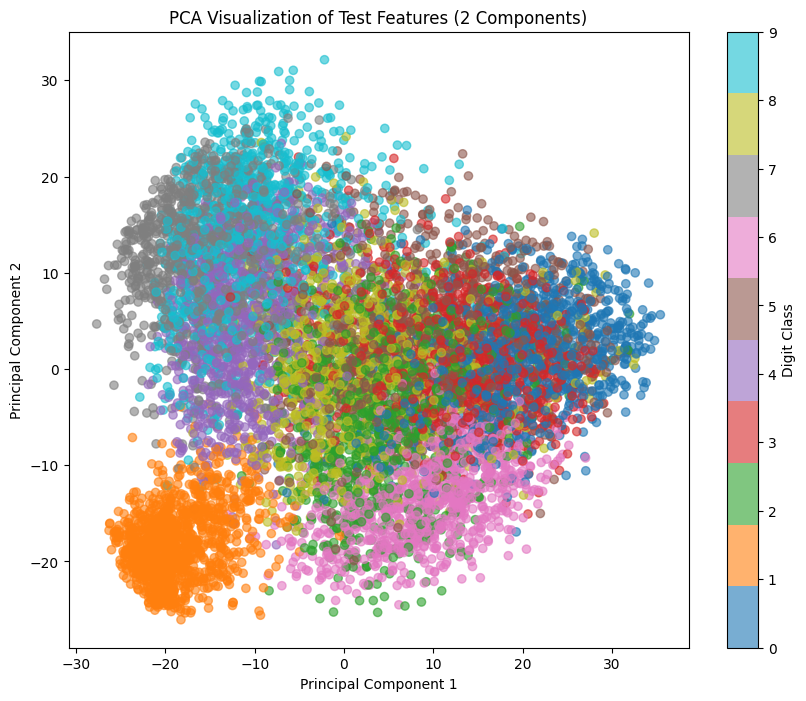


g. kNN test accuracy on 10 PCA components: 0.9567


In [ ]:
#a. Number of parameters at each layer
for layer in model.layers:
    print(f"{layer.name}: {layer.count_params()} parameters")

#b. Size of final extracted feature vector
flatten_layer = model.get_layer(index=5)  
feature_extractor = Model(inputs=model.input, outputs=flatten_layer.output)
test_output = feature_extractor.predict(train_x[:1]) 
feature_vector_size = test_output.shape[1]  
print(f"\nb. Size of final extracted feature vector: {feature_vector_size}")

#c. Accuracy on training and test sets
train_loss, train_acc = model.evaluate(train_x, train_y_cat, verbose=0)
test_loss, test_acc = model.evaluate(test_x, test_y_cat, verbose=0)
print(f"\nc. Training accuracy: {train_acc:.4f}")
print(f"Test accuracy: {test_acc:.4f}")

#d. Confusion matrix 
y_pred = model.predict(test_x)
y_pred_classes = np.argmax(y_pred, axis=1)
cm = confusion_matrix(test_y, y_pred_classes)

print("\nd. Confusion Matrix:")
print(cm)

#e. kNN on extracted features 
#Extract features for all data
X_all = np.concatenate((train_x, test_x))
features_all = feature_extractor.predict(X_all)
y_all = np.concatenate((train_y, test_y))

#Split back into train and test
n_train = len(train_x)
features_train = features_all[:n_train]
features_test = features_all[n_train:]

#Train kNN
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(features_train, train_y)
knn_acc = knn.score(features_test, test_y)
print(f"\ne. kNN test accuracy on extracted features: {knn_acc:.4f}")

#f. PCA visualization with 2 components 
pca = PCA(n_components=2)
features_test_pca = pca.fit_transform(features_test)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(features_test_pca[:,0], features_test_pca[:,1], c=test_y, cmap='tab10', alpha=0.6)
plt.title('PCA Visualization of Test Features (2 Components)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter, label='Digit Class')
plt.show()

#g. PCA with 10 components and kNN
pca10 = PCA(n_components=10)
features_train_pca10 = pca10.fit_transform(features_train)
features_test_pca10 = pca10.transform(features_test)

knn_pca10 = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn_pca10.fit(features_train_pca10, train_y)
knn_pca10_acc = knn_pca10.score(features_test_pca10, test_y)
print(f"\ng. kNN test accuracy on 10 PCA components: {knn_pca10_acc:.4f}")